# Customer Retention Analysis
Business can thrive and dive depending upon how happy your customers are, how loyal they are, and how willing they are to keep buying your services. Loyal customers are worth up to 10 times as much their first purchase and it is 6 to 7 times more expensive to land a new customer than to keep a current one. 

This project is aimed to

1. Understand the causes and/or scenarios causing attrition of customers 
2. Provide a predictive model that ranks the customers 
3. Learn the factors which are strongly correlated with churn rate 
4. Make recommendations to minimize the revenue loss 



# Dataset
In this project We will be using the [Telco Customer Churn dataset](https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv) to study the customer behavior in order to develop focused customer retention programs.

This dataset has 7043 samples and 21 features, the features includes 

1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents

# Questions we will try to answer during this project

1. Which variables influences if the client will leave? 
2. What are the most important variables to look?
3. Which clients have the highest chance of leaving?

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
import matplotlib.patches as mpatches
%matplotlib inline

# Data Ingestion

In [15]:
#Loading the data
df = pd.read_excel("Customer-Churn-Dataset.xls")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [17]:
df.shape

(7043, 21)

In [18]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [19]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
19.65       8
19.9        8
20.05       8
45.3        7
19.55       7
20.15       6
19.45       6
20.25       6
20.45       5
20.3        5
44          4
74.7        4
19.4        4
69.9        4
70.6        4
69.6        4
19.85       4
19.3        4
50.15       4
19.95       4
19.5        4
20.35       4
69.95       4
19.2        4
69.65       4
20.5        4
44.4        4
           ..
1345.85     1
6792.45     1
762.45      1
6794.75     1
761.85      1
6743.55     1
1348.9      1
6741.15     1
6717.9      1
6705.7      1
4447.75     1
6707.15     1
2917.65     1
62.9        1
6710.5      1
6713.2      1
914         1
6716.45     1
63.15       1
742.9       1
6719.9      1
139.25      1
265.75      1
6725.5      1
2603.3      1
743.05      1
6733        1
4443.45     1
6735.05     1
4764        1
Name: TotalCharges, Length: 6531, dtype: int64

**Since we have 11 missing values in variable 'TotalCharges', so we will replace these empty spaces ith NA values.**

In [20]:
#Replacing empty spaces with Null values
df = df.replace(r'^\s+$', np.nan, regex=True)

In [21]:
df['TotalCharges'].value_counts()

20.20      11
19.75       9
19.65       8
20.05       8
19.90       8
45.30       7
19.55       7
19.45       6
20.15       6
20.25       6
20.30       5
20.45       5
69.95       4
69.90       4
19.85       4
69.60       4
44.40       4
69.65       4
19.50       4
19.20       4
19.95       4
49.90       4
20.50       4
20.35       4
70.60       4
44.00       4
50.15       4
19.40       4
75.30       4
74.70       4
           ..
1971.15     1
1793.25     1
1212.85     1
1504.05     1
1319.95     1
572.20      1
5958.85     1
1673.80     1
958.15      1
7610.10     1
92.05       1
2666.75     1
1001.50     1
7262.00     1
4740.00     1
96.45       1
4483.95     1
5574.75     1
44.65       1
2688.45     1
1374.35     1
3107.30     1
248.95      1
607.30      1
1534.05     1
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6530, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [23]:
df['TotalCharges'].isnull().sum()

11

**Now all the empty spaces are removed from the dataset, now the dataset is almost complete so I will drop the few NA rows that has Null values**

In [24]:
# Dropping NA values
df = df.dropna()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

# Visualizing the missingness of data

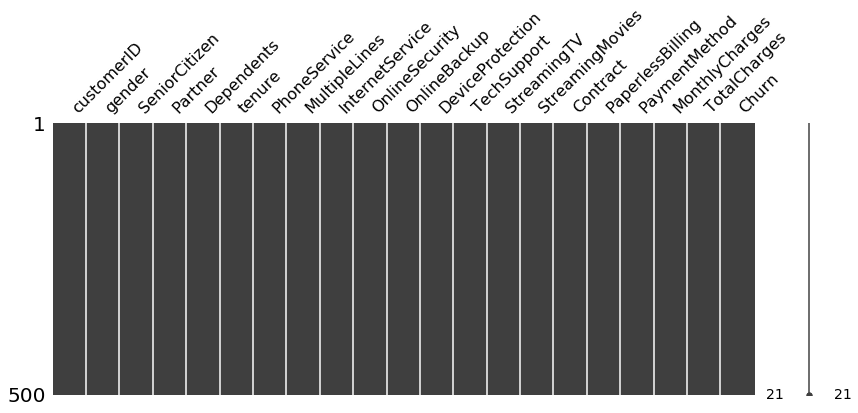

In [26]:
# Matrix of missingness of the data
missingness=msno.matrix(df.sample(500), figsize=(14, 5), width_ratios=(14, 1));

**Now the dataset is completely clean and we can start our analysis, but before diving into further analysis let us change the 'SeniorCitizen' variable from interger to categorial as this variable signifies the status of seniority of the customer**

In [27]:
df['SeniorCitizen']=pd.Categorical(df['SeniorCitizen'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null category
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: category(1), float64(

**So until now I have checked the size of my dataset,'CustomerId' is specific and unique to every row and it doesn’t help to predict if the client is going to Churn. So we will delete the CustomerID.**

In [29]:
# Deleting the custumerID column
del df["customerID"]

# Intial Analysis

# Lets split the dataset into numeric and objects to facilitate the analysis

In [30]:
#Splitting data according to datatypes
num = ['float64', 'int64']
num_df = df.select_dtypes(include=num)
obj_df = df.select_dtypes(exclude=num)

In [31]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [32]:
obj_df.describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [33]:
df.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

**The above gives us the idea that how the data is, and now we move further to understand correlation between variables.**

# Univariate Distribution

Now let us consider the numeric variables , how they are distributed and how they are related to each other and also how they can help in to predict the 'Churn' variable.

**To see the distribution we will use Boxplots and Histograms**

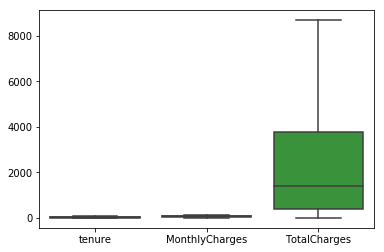

In [34]:
sns.boxplot(data = num_df)

[]

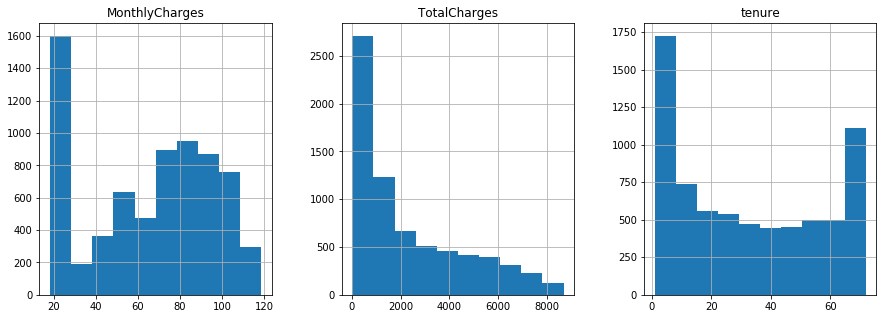

In [35]:
# histogram plots
num_df.hist(layout=(1,3), figsize=(15,5))
plt.plot()

The above two plots shows that the numeric variables are not normally distributed , lets check how they are related to the variable we are trying to predict.

**Lets add the 'Churn' variable in numeric dataset**

In [41]:
num_df = pd.concat([num_df,df["Churn"]],axis=1)

In [42]:
num_df.head()

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.85,No
1,34,56.95,1889.50,No
2,2,53.85,108.15,Yes
3,45,42.30,1840.75,No
4,2,70.70,151.65,Yes


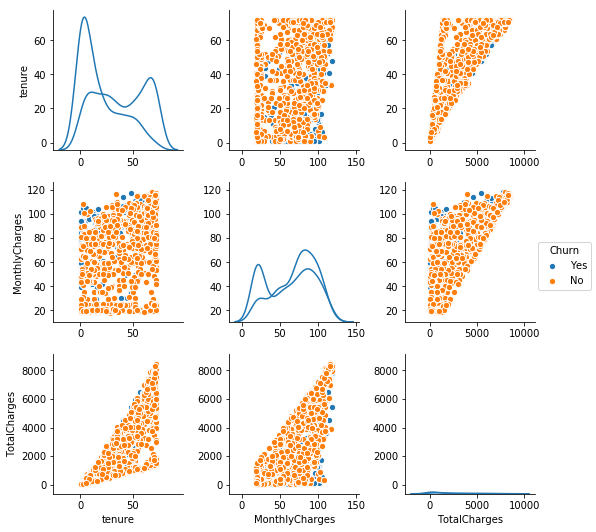

In [43]:
#Plotting pair plot to identify relationship between 'Churn' and other variables
g = sns.PairGrid(num_df.sample(n=1000), hue="Churn")
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

From the above plots 'tenure' and 'MonthlyCharges' are looking good predictors of the 'Churn' variable

Now lets divide the three numerical variables into bins and try to plot separately to identify the low Churn areas and high Churn areas.

We will use violin plots to decide bins of the numerical variables that we are going to use.

# Bivariate Distribution

Bivariate Distribution will allow us to identify how each numeric variable is distributed with respect to target variable 'Churn'

**Plotting for 'tenure' variable**

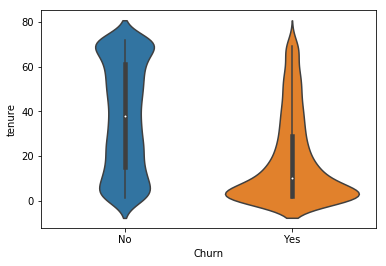

In [46]:
sns.violinplot(x="Churn", y="tenure", data=num_df);

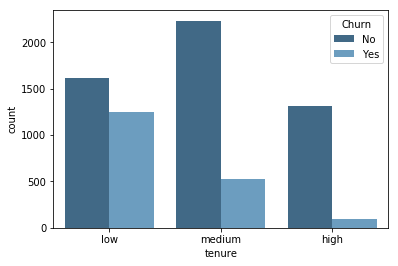

In [58]:
#Creating bins and plotting Countplot for 'tenure'
tenure_bins=pd.cut(num_df["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
sns.countplot(x=tenure_bins, hue="Churn", data=num_df, palette="Blues_d");

**Plotting for 'MonthlyCharges' variable**

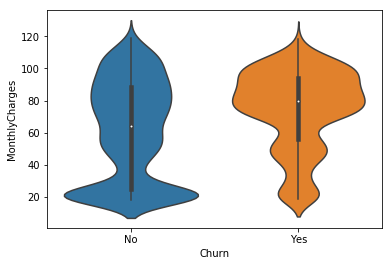

In [52]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=num_df);

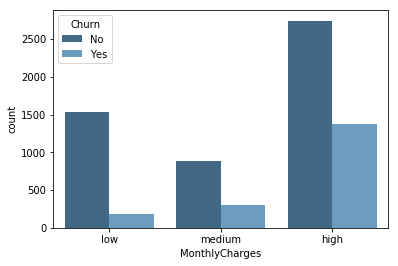

In [57]:
#Creating bins and plotting Countplot for 'MonthlyCharges'
MonthlyCharges_bins=pd.cut(num_df["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=num_df, palette="Blues_d");

**Plotting for 'TotalCharges' variable**

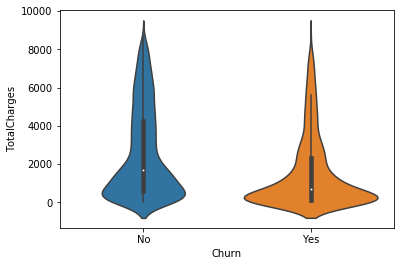

In [59]:
sns.violinplot(x="Churn", y="TotalCharges", data=num_df);

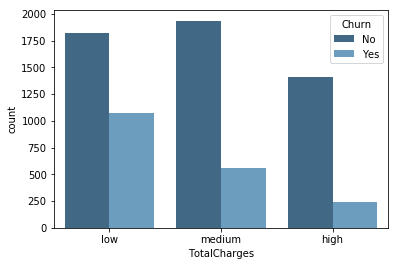

In [60]:
#Creating bins and plotting Countplot for 'MonthlyCharges'
TotalCharges_bins=pd.cut(num_df["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])
sns.countplot(x=TotalCharges_bins, hue="Churn", data=num_df, palette="Blues_d");

I divided all three numerical variables in 3 bins according to the violin plot trying to separate then in a way to distinguish the low churn rate areas from the high churn rate areas and you can see from the count plots how the distribution is different in each bin

**From the above plots following can be deducted:**
    
    1. Less than a year tenure category has highest churn
    2. Customers paying high Monthly charges tends to churn more
    3. 2 to 5 years tenure category results in highest revenue loss
    
> * From the distribution we also concluded that **TotalCharges is almost = tenure * MothlyCharges**
> * Hence TotalCharges is Redundant should not be considered in further analysis